In [1]:
# 데이터 프레임
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 회귀 예측 모델
from statsmodels.api import Logit
import statsmodels

# 사이킷런
## 데이터 정제
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

## 분류 모델
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
### 분류-TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

## 예측 모델

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

## 그리드 서치
from sklearn.model_selection import GridSearchCV

## 평가
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import xgboost

# 
from subprocess import call

# 경고메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 폰트 설정
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus=False)

In [2]:
df = pd.read_csv("data/data_for_modeling_v2.csv")
df = df.drop(columns=['idUser','VisitCount','SalesYear'])
df

,SalesMonth,Price,간편식사_도시락,간편식사_샌드위치,간편식사_주먹밥,과자류_껌/초,과자류_빵/디,과자류_스낵,식품_가공식,식품_식재료,...,Gender_여성,AgeGroup_10대,AgeGroup_20대,AgeGroup_30대,AgeGroup_40대,AgeGroup_50대,AgeGroup_60대이상,TempAvg,RainfallAmount,HumidAvg
0,1,8250,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,-2.370968,0.609677,57.451613
1,4,47600,0,1,0,0,3,1,4,1,...,1,0,0,1,0,0,0,14.753333,0.680000,55.030000
2,5,138600,0,2,1,6,3,4,8,8,...,1,0,0,1,0,0,0,19.122581,0.241935,55.335484
3,6,127150,1,0,0,2,6,3,10,3,...,1,0,0,1,0,0,0,23.303333,13.126667,73.376667
4,7,248800,0,1,1,11,12,8,10,12,...,1,0,0,1,0,0,0,27.329032,8.138710,77.232258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18187,8,89000,1,1,1,2,6,0,7,5,...,0,0,0,1,0,0,0,25.741935,18.219355,80.170968
18188,9,39050,0,0,1,2,2,4,3,3,...,0,0,0,1,0,0,0,22.353333,6.716667,68.090000
18189,10,102290,2,1,0,3,3,2,6,4,...,0,0,0,1,0,0,0,14.564516,4.003226,68.887097
18190,11,131280,1,1,0,1,3,1,8,4,...,0,0,0,1,0,0,0,10.030000,2.816667,64.390000


## 1. 데이터 구성하기

In [3]:
df_y = df['Price']
df_x = df.drop('Price',axis=1,inplace=False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size=0.4)

print("train data X size: {}".format(df_train_x.shape))
print("test data X size: {}".format(df_test_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (10915, 28)
test data X size: (7277, 28)
train data Y size: (10915,)
test data Y size: (7277,)


## 2. 모델 생성 및 파라미터 조정

### 2-1. Decision Tree
#### 기본 옵션으로 모델 생성

In [8]:
dt_uncustomized = DecisionTreeRegressor()
dt_uncustomized.fit(df_train_x, df_train_y)

print("-------UNCUSTOMIZED TREE-------")
print("")
print(dt_uncustomized.get_params())
print("")
print("Score on training set: {:.3f}".format(dt_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(dt_uncustomized.score(df_test_x, df_test_y)))

-------UNCUSTOMIZED TREE-------

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Score on training set: 1.000
Score on test set: 0.879


#### 모델 파라미터 조정

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.877
1,2,0.994,0.887
2,3,0.985,0.893
3,4,0.978,0.901
4,5,0.972,0.905
5,6,0.967,0.908
6,7,0.963,0.909
7,8,0.959,0.911
8,9,0.955,0.911
9,10,0.953,0.911


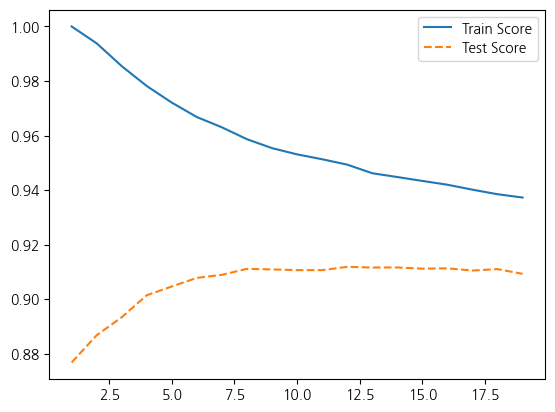

In [11]:
##### min_samples_leaf
# min_samples_leaf 에 따른 모델 성능
train_score = []; test_score = []
para_leaf = [n_leaf for n_leaf in range(1,20)]
for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

# 모델 설명력 확인
display(df_score_leaf.round(3))

plt.plot(para_leaf, train_score, linestyle='-',label='Train Score')
plt.plot(para_leaf, test_score, linestyle='--',label='Test Score')
plt.legend()
#### -> min_samples_leaf를 5로 설정

    MinSamplesSplit  TrainScore  TestScore
0                 4       0.997      0.881
1                 6       0.991      0.888
2                 8       0.986      0.893
3                10       0.982      0.897
4                12       0.978      0.899
5                14       0.974      0.900
6                16       0.971      0.904
7                18       0.968      0.904
8                20       0.966      0.905
9                22       0.963      0.906
10               24       0.961      0.907
11               26       0.958      0.908
12               28       0.956      0.908
13               30       0.954      0.909
14               32       0.952      0.908
15               34       0.951      0.908
16               36       0.950      0.908
17               38       0.949      0.908


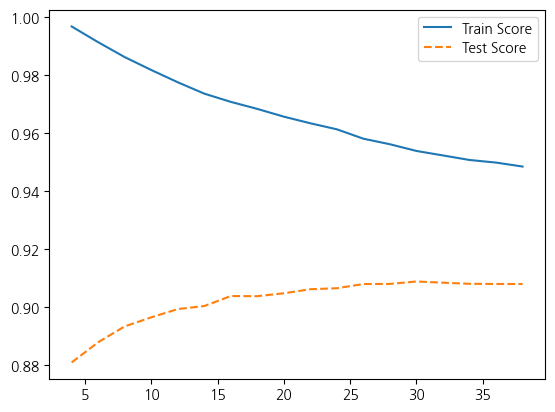

In [12]:
#### min_samples_split
# min_samples_split 에 따른 모델 성능
train_score = []; test_score = []
para_split = [n_split*2 for n_split in range(2,20)]
for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

# 모델 설명력 확인
print(df_score_split.round(3))
plt.plot(para_split, train_score, linestyle='-',label='Train Score')
plt.plot(para_split, test_score, linestyle='--',label='Test Score')
plt.legend()
#### # min_samples_split --> 16으로 설정

    Depth  TrainScore  TestScore
0       1       0.544      0.549
1       2       0.718      0.721
2       3       0.800      0.801
3       4       0.846      0.842
4       5       0.877      0.866
5       6       0.901      0.883
6       7       0.919      0.894
7       8       0.936      0.900
8       9       0.951      0.902
9      10       0.964      0.899
10     11       0.975      0.896
11     12       0.984      0.891
12     13       0.990      0.888
13     14       0.994      0.883
14     15       0.997      0.884
15     16       0.998      0.882
16     17       0.999      0.881
17     18       1.000      0.879
18     19       1.000      0.881
19     20       1.000      0.881


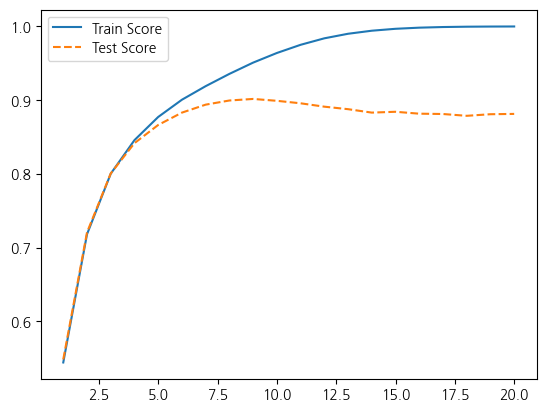

In [14]:
#### max_depth
# max_depth 에 따른 모델 성능
train_score = []; test_score = []
para_depth = [depth for depth in range(1,21)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

# 모델 설명력 확인
print(df_score_depth.round(3))
plt.plot(para_depth, train_score, linestyle='-',label='Train Score')
plt.plot(para_depth, test_score, linestyle='--',label='Test Score')
plt.legend()
#### max_depth -->10으로 설정

In [6]:
para_leaf = [n_leaf for n_leaf in range(1,20)]
para_split = [n_split*2 for n_split in range(2,20)]
para_depth = [depth for depth in range(1,16)]

#### GridSearchCV를 이용해 최적 parameter 찾기

In [15]:
# estimator = DecisionTreeRegressor()
# param_grid = {'criterion': ['min_squared_error','friedman_mse', 'min_absolute_error'], \
#                            'max_depth': para_depth, 'min_samples_leaf': para_leaf, \
#                            'min_samples_split': para_split}

# grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs=-1)
# grid_dt.fit(df_train_x, df_train_y)

# print("best estimator model:\n{}\n".format(grid_dt.best_estimator_))
# print("best parameter model:\n{}\n".format(grid_dt.best_params_))
# print("best score model:\n{}\n".format(grid_dt.best_score_.round(3)))

#### 결론 도출

In [4]:
v_feature_name = df_train_x.columns
tree_final = DecisionTreeRegressor(criterion= 'friedman_mse', max_depth=10,\
                                   min_samples_leaf=5, min_samples_split=16 )
tree_final.fit(df_train_x, df_train_y)
print(tree_final.get_params(),end="\n\n")

test_pred = tree_final.predict(df_test_x)
print('test data의 실제 값:\n',df_test_y[:10].values)
print('test data의 예측 값:\n',test_pred[:10])

print("Score on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 16, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

test data의 실제 값:
 [ 46600  47500  16700  56900  48300  59300  18500 110750   1500 105000]
test data의 예측 값:
 [ 35643.18181818  55330.          15467.13043478  68863.63636364
  65436.66666667  63666.21621622  23718.61386139 131613.33333333
   5181.25       101412.5       ]
Score on training set: 0.955
Score on test set: 0.904


In [5]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
7,식품_가공식,0.721
8,식품_식재료,0.118
13,음료_음료,0.072
10,아이스크_아이스,0.029
9,식품_안주류,0.015
5,과자류_빵/디,0.015
6,과자류_스낵,0.012
4,과자류_껌/초,0.007
1,간편식사_도시락,0.003
2,간편식사_샌드위치,0.002



Decision Tree score model:0.904



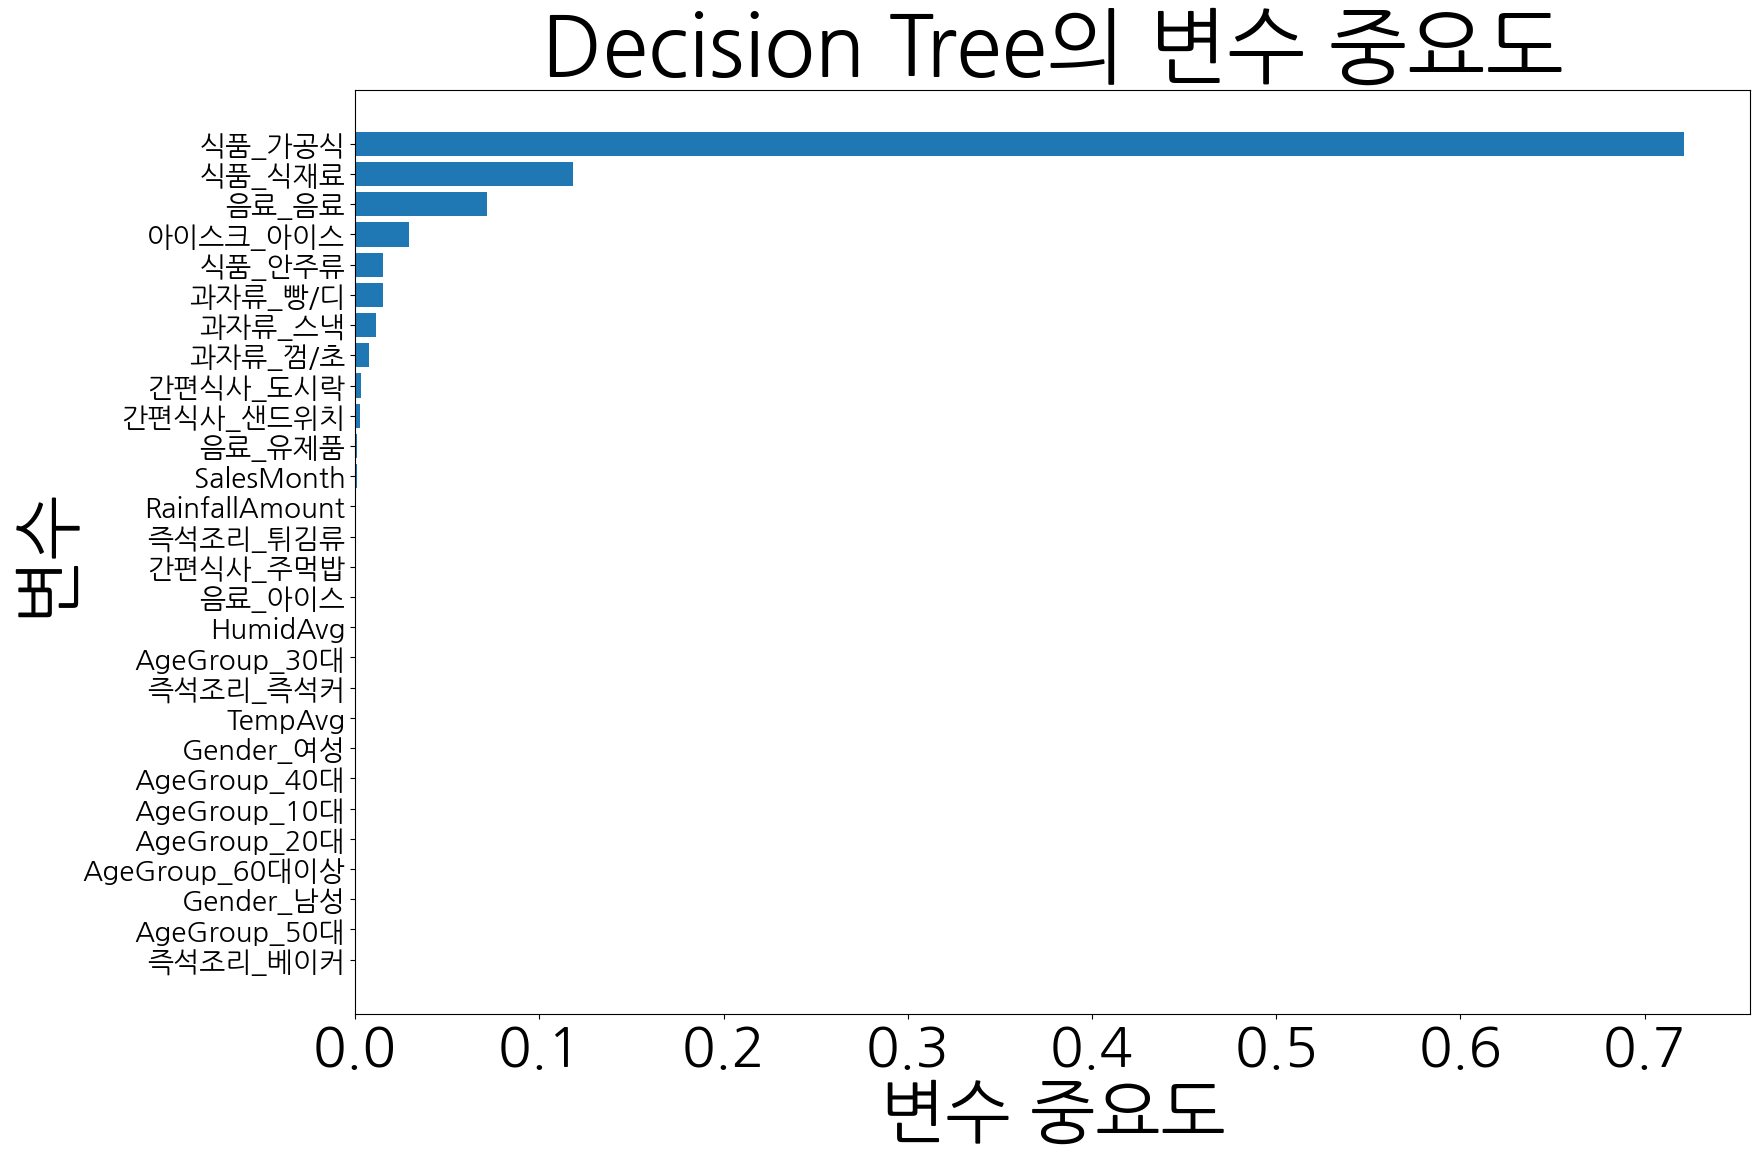

In [16]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.figure(figsize=(18,12))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance['Feature'])
plt.title("Decision Tree의 변수 중요도", fontsize=60)
plt.xlabel("변수 중요도", fontsize=50)
plt.ylabel("변수", fontsize=50)
plt.xticks( fontsize = 40)
plt.yticks(fontsize = 20)

print("\nDecision Tree score model:{:.3f}\n".format(tree_final.score(df_test_x,df_test_y)))

In [22]:
print("score model:\n{}\n".format(tree_final.score(df_test_x,df_test_y)))

score model:
0.9083890875941651



### 2-2. Random Forest

#### 기본 옵션으로 모델 생성

In [26]:
rf_uncustomized = RandomForestRegressor()
rf_uncustomized.fit(df_train_x, df_train_y)

print("-------UNCUSTOMIZED RF-------")
print("")
print(rf_uncustomized.get_params())
print("")
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

-------UNCUSTOMIZED RF-------

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Score on training set: 0.993
Score on test set: 0.953


#### 모델 파라미터 조정

    n_estimators  TrainScore  TestScore
0             10       0.989      0.946
1             20       0.991      0.949
2             30       0.992      0.951
3             40       0.992      0.951
4             50       0.993      0.952
5             60       0.993      0.953
6             70       0.993      0.952
7             80       0.993      0.952
8             90       0.993      0.953
9            100       0.993      0.953
10           110       0.993      0.953
11           120       0.993      0.953
12           130       0.993      0.953
13           140       0.993      0.953
14           150       0.993      0.953
15           160       0.993      0.953
16           170       0.993      0.953
17           180       0.993      0.953
18           190       0.993      0.953
19           200       0.993      0.953


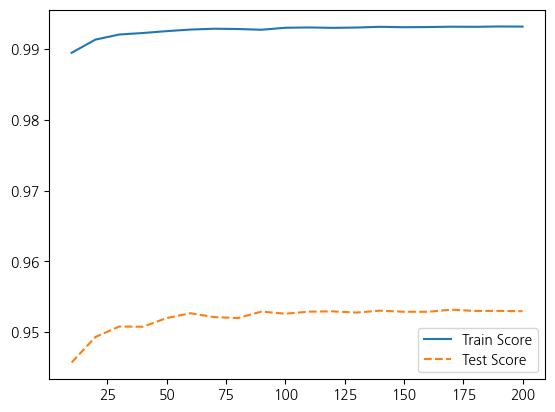

In [28]:
#### n_estimators
# n_estimators 에 따른 모델 성능
train_score = []; test_score = []
para_n_tree = [n_tree*10 for n_tree in range(1,21)]
for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators=v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_rf = pd.DataFrame()
df_score_rf["n_estimators"] = para_n_tree
df_score_rf["TrainScore"] = train_score
df_score_rf["TestScore"] = test_score

# 모델 설명력 확인
print(df_score_rf.round(3))

plt.plot(para_n_tree, train_score, linestyle='-',label='Train Score')
plt.plot(para_n_tree, test_score, linestyle='--',label='Test Score')
plt.legend()
#### n_estimators -> 100

    MinSamplesLeaf  TrainScore  TestScore
0                1       0.993      0.952
1                2       0.990      0.952
2                3       0.985      0.952
3                4       0.981      0.951
4                5       0.977      0.950
5                6       0.974      0.950
6                7       0.971      0.949
7                8       0.969      0.948
8                9       0.967      0.947
9               10       0.965      0.947
10              11       0.963      0.946
11              12       0.961      0.945
12              13       0.960      0.945
13              14       0.959      0.943
14              15       0.958      0.943
15              16       0.956      0.943
16              17       0.955      0.942
17              18       0.954      0.941
18              19       0.953      0.940
19              20       0.953      0.940


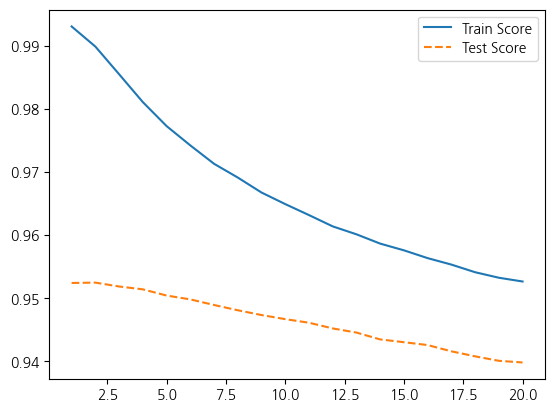

In [29]:
#### min_samples_leaf
# min_samples_leaf 에 따른 모델 성능
train_score = []; test_score = []
para_leaf = [leaf for leaf in range(1,21)]
for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(n_estimators=100,\
                              min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

# 모델 설명력 확인
print(df_score_leaf.round(3))

plt.plot(para_leaf, train_score, linestyle='-',label='Train Score')
plt.plot(para_leaf, test_score, linestyle='--',label='Test Score')
plt.legend()
#### min_samples_leaf -> 5

    MinSamplesSplit  TrainScore  TestScore
0                 2       0.977      0.950
1                 4       0.977      0.950
2                 6       0.977      0.950
3                 8       0.977      0.951
4                10       0.977      0.950
5                12       0.976      0.950
6                14       0.974      0.949
7                16       0.972      0.949
8                18       0.971      0.949
9                20       0.970      0.949
10               22       0.969      0.948
11               24       0.967      0.948
12               26       0.966      0.947
13               28       0.965      0.947
14               30       0.964      0.946
15               32       0.963      0.945
16               34       0.962      0.945
17               36       0.961      0.945
18               38       0.960      0.944
19               40       0.960      0.944


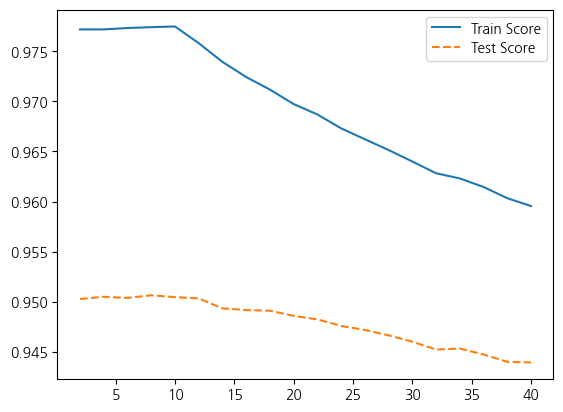

In [31]:
#### min_samples_split
# min_samples_split 에 따른 모델 성능
train_score = []; test_score = []
para_split = [split*2 for split in range(1,21)]
for v_min_samples_split in para_split:
    rf = RandomForestRegressor( n_estimators=100,\
                              min_samples_leaf = 5, \
                               min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

# 모델 설명력 확인
print(df_score_split.round(3))

plt.plot(para_split, train_score, linestyle='-',label='Train Score')
plt.plot(para_split, test_score, linestyle='--',label='Test Score')
plt.legend()
#### MinSamplesSplit -> 8

    Depth  TrainScore  TestScore
0       1       0.578      0.581
1       2       0.778      0.778
2       3       0.850      0.848
3       4       0.887      0.884
4       5       0.916      0.909
5       6       0.935      0.925
6       7       0.949      0.936
7       8       0.959      0.942
8       9       0.966      0.946
9      10       0.971      0.949
10     11       0.974      0.950
11     12       0.976      0.950
12     13       0.977      0.950
13     14       0.977      0.950
14     15       0.977      0.951
15     16       0.977      0.950
16     17       0.977      0.950
17     18       0.977      0.951
18     19       0.977      0.950
19     20       0.977      0.951


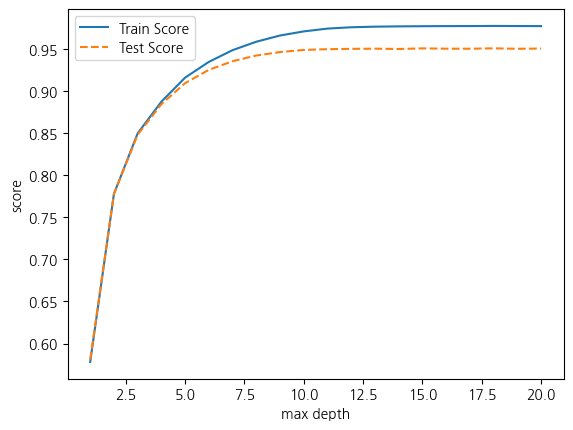

In [33]:
#### max_depth
# max_depth 에 따른 모델 성능
train_score = []; test_score = []
para_depth = [depth for depth in range(1,21)]
for v_max_depth in para_depth:
    rf = RandomForestRegressor(n_estimators=100,\
                               min_samples_leaf = 5, \
                               min_samples_split = 8, \
                               max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

# 모델 설명력 확인
print(df_score_depth.round(3))

plt.plot(para_depth, train_score, linestyle='-',label='Train Score')
plt.plot(para_depth, test_score, linestyle='--',label='Test Score')
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()
#### max_depth -> 15

#### 모델 파라미터 조정

In [10]:
para_n_tree = [n_tree*10 for n_tree in range(1,11)]
para_leaf = [leaf for leaf in range(1,21)]
para_split = [split*2 for split in range(1,21)]
para_depth = [depth for depth in range(1,11)]

#### GridSearchCV를 이용해 최적 parameter 찾기

In [ ]:
# estimator = RandomForestRegressor()
# param_grid = {'n_estimators' : para_n_tree,  \
#               'max_depth': para_depth, 'min_samples_leaf': para_leaf, \
#                            'min_samples_split': para_split}

# grid_rf = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs=-1)
# grid_rf.fit(df_train_x, df_train_y)

# print("best estimator model:\n{}\n".format(grid_rf.best_estimator_))
# print("best parameter model:\n{}\n".format(grid_rf.best_params_))
# print("best score model:\n{}\n".format(grid_rf.best_score_.round(3)))

#### 결론 도출
##### 최종 모델 생성

In [17]:
v_feature_name = df_train_x.columns

rf_final = RandomForestRegressor(n_estimators=100,\
                               min_samples_leaf = 5, \
                               min_samples_split = 8, \
                               max_depth = 15)
rf_final.fit(df_train_x, df_train_y)
print(tree_final.get_params(),end="\n\n")

test_pred = rf_final.predict(df_test_x)
print('test data의 실제 값:\n',df_test_y[:10])
print('test data의 예측 값:\n',test_pred[:10])

v_feature_name = df_train_x.columns

print("score model:\n{}\n".format(rf_final.score(df_test_x,df_test_y)))

print("\n\nScore on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 16, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

test data의 실제 값:
 8696      46600
12006     47500
3424      16700
5661      56900
10007     48300
3961      59300
16142     18500
18154    110750
5217       1500
7188     105000
Name: Price, dtype: int64
test data의 예측 값:
 [ 37976.57555906  42319.5826616   16693.13285677  65527.60581165
  60637.37328202  46250.12937747  19249.04008839 123144.38069223
   3069.64424542 118755.02900225]
score model:
0.949992764069202



Score on training set: 0.978
Score on test set: 0.950


#### feature_importances

           Feature  Importance
7           식품_가공식       0.667
8           식품_식재료       0.161
13           음료_음료       0.066
10        아이스크_아이스       0.031
5          과자류_빵/디       0.019
9           식품_안주류       0.018
6           과자류_스낵       0.011
4          과자류_껌/초       0.009
1         간편식사_도시락       0.004
2        간편식사_샌드위치       0.003
12          음료_유제품       0.002
26  RainfallAmount       0.002
0       SalesMonth       0.001
25         TempAvg       0.001
27        HumidAvg       0.001
3         간편식사_주먹밥       0.001
11          음료_아이스       0.001
16        즉석조리_튀김류       0.001
14        즉석조리_베이커       0.001
21    AgeGroup_30대       0.000
20    AgeGroup_20대       0.000
22    AgeGroup_40대       0.000
18       Gender_여성       0.000
17       Gender_남성       0.000
15        즉석조리_즉석커       0.000
19    AgeGroup_10대       0.000
23    AgeGroup_50대       0.000
24  AgeGroup_60대이상       0.000


Text(0, 0.5, '변수')

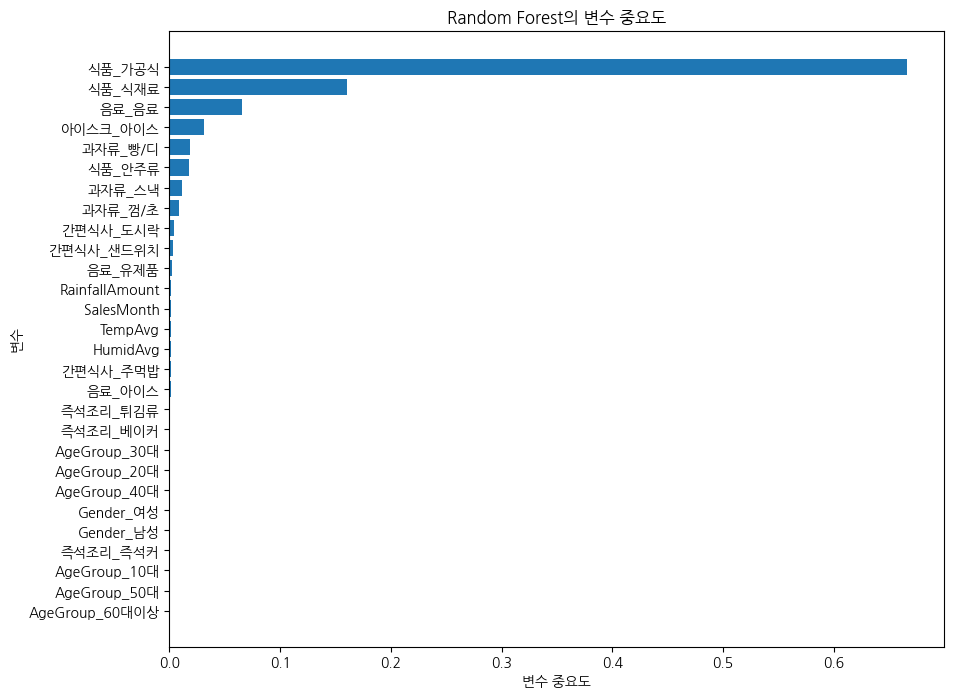

In [18]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
print(df_importance.round(3))

df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.figure(figsize=(10,8))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance['Feature'])
plt.title("Random Forest의 변수 중요도")
plt.xlabel("변수 중요도")
plt.ylabel("변수")

### 그래디언트 부스팅

#### 기본 옵션으로 모델 생성

In [36]:
gb_uncustomized = GradientBoostingRegressor()
gb_uncustomized.fit(df_train_x, df_train_y)

print("-------UNCUSTOMIZED GB-------")
print("")
print(gb_uncustomized.get_params())
print("")
print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

-------UNCUSTOMIZED GB-------

{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

Score on training set: 0.963
Score on test set: 0.959


#### 모델 파라미터 조정

    Estimators  TrainAccuracy  TestAccuracy
0           10          0.765         0.763
1           20          0.911         0.909
2           30          0.945         0.943
3           40          0.954         0.952
4           50          0.958         0.955
5           60          0.960         0.956
6           70          0.961         0.957
7           80          0.962         0.958
8           90          0.963         0.958
9          100          0.963         0.959
10         110          0.964         0.959
11         120          0.964         0.959
12         130          0.964         0.959
13         140          0.965         0.960
14         150          0.965         0.960
15         160          0.965         0.960
16         170          0.966         0.960
17         180          0.966         0.960
18         190          0.966         0.960
19         200          0.967         0.961


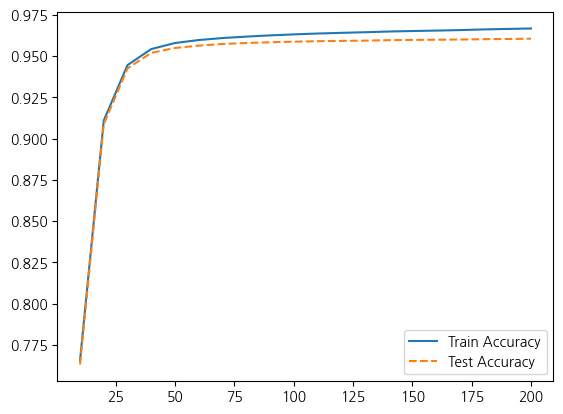

In [39]:
# n_estimators 에 따른 모델 성능
train_score = []; test_score = []
para_n_tree = [n_tree*10 for n_tree in range(1,21)]
for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor( n_estimators=v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["Estimators"] = para_n_tree
df_score_n["TrainAccuracy"] = train_score
df_score_n["TestAccuracy"] = test_score

# 모델 설명력 확인
print(df_score_n.round(3))

plt.plot(para_n_tree, train_score, linestyle='-',label='Train Accuracy')
plt.plot(para_n_tree, test_score, linestyle='--',label='Test Accuracy')
plt.legend()

#### Estimators->140

    MinSamplesLeaf  TrainAccuracy  TestAccuracy
0                1          0.965         0.960
1                2          0.965         0.960
2                3          0.965         0.960
3                4          0.965         0.960
4                5          0.965         0.959
5                6          0.965         0.960
6                7          0.965         0.960
7                8          0.965         0.960
8                9          0.965         0.960
9               10          0.965         0.960
10              11          0.965         0.960
11              12          0.965         0.960
12              13          0.965         0.960
13              14          0.965         0.960
14              15          0.965         0.960
15              16          0.965         0.960
16              17          0.964         0.960
17              18          0.964         0.960
18              19          0.964         0.960
19              20          0.964       

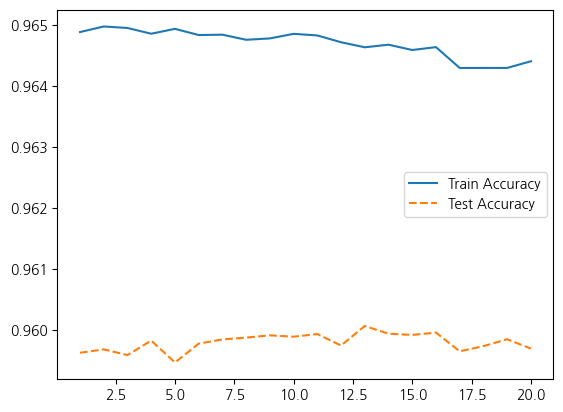

In [40]:
# min_samples_leaf 에 따른 모델 성능
train_score = []; test_score = []
para_leaf = [leaf for leaf in range(1,21)]
for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(n_estimators=140,\
                              min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainAccuracy"] = train_score
df_score_leaf["TestAccuracy"] = test_score

# 모델 설명력 확인
print(df_score_leaf.round(3))

plt.plot(para_leaf, train_score, linestyle='-',label='Train Accuracy')
plt.plot(para_leaf, test_score, linestyle='--',label='Test Accuracy')
plt.legend()

#### MinSamplesLeaf-> 4

    MinSamplesSplit  TrainAccuracy  TestAccuracy
0                 2          0.965          0.96
1                 4          0.965          0.96
2                 6          0.965          0.96
3                 8          0.965          0.96
4                10          0.965          0.96
5                12          0.965          0.96
6                14          0.965          0.96
7                16          0.965          0.96
8                18          0.965          0.96
9                20          0.965          0.96
10               22          0.965          0.96
11               24          0.965          0.96
12               26          0.965          0.96
13               28          0.965          0.96
14               30          0.965          0.96
15               32          0.965          0.96
16               34          0.965          0.96
17               36          0.965          0.96
18               38          0.965          0.96
19               40 

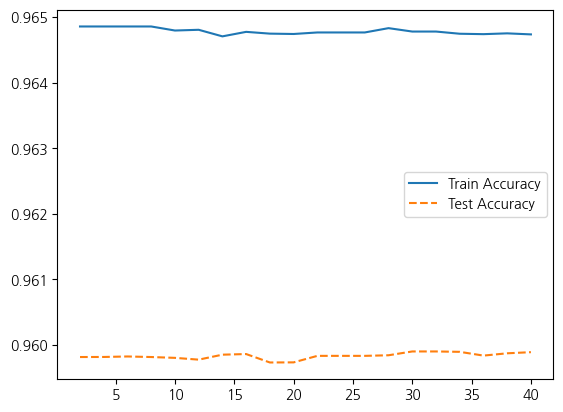

In [41]:
# min_samples_split 에 따른 모델 성능
train_score = []; test_score = []
para_split = [split*2 for split in range(1,21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor( n_estimators=140,\
                              min_samples_leaf = 4, \
                               min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainAccuracy"] = train_score
df_score_split["TestAccuracy"] = test_score

# 모델 설명력 확인
print(df_score_split.round(3))
plt.plot(para_split, train_score, linestyle='-',label='Train Accuracy')
plt.plot(para_split, test_score, linestyle='--',label='Test Accuracy')
plt.legend()

#### min_samples_split -> 설정X

   Depth  TrainAccuracy  TestAccuracy
0      1          0.951         0.949
1      2          0.961         0.959
2      3          0.965         0.960
3      4          0.970         0.960
4      5          0.975         0.960
5      6          0.981         0.958
6      7          0.987         0.958
7      8          0.992         0.956
8      9          0.996         0.955
9     10          0.998         0.954


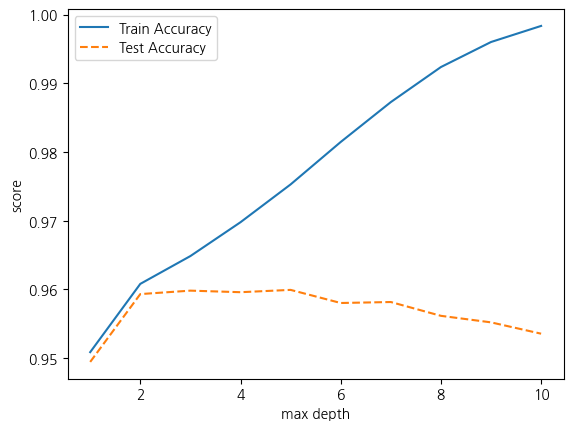

In [42]:
# max_depth 에 따른 모델 성능
train_score = []; test_score = []
para_depth = [depth for depth in range(1,11)]
for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(  n_estimators=140,\
                              min_samples_leaf = 4, \
                                   max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))    

df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainAccuracy"] = train_score
df_score_depth["TestAccuracy"] = test_score

# 모델 설명력 확인
print(df_score_depth.round(3))
plt.plot(para_depth, train_score, linestyle='-',label='Train Accuracy')
plt.plot(para_depth, test_score, linestyle='--',label='Test Accuracy')
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()
#### max_depth -> 5

   Learning rate  TrainAccuracy  TestAccuracy
0           0.01          0.877         0.871
1           0.02          0.956         0.948
2           0.03          0.967         0.957
3           0.04          0.970         0.958
4           0.05          0.972         0.959
5           0.06          0.973         0.959
6           0.07          0.974         0.959
7           0.08          0.974         0.960
8           0.09          0.975         0.959


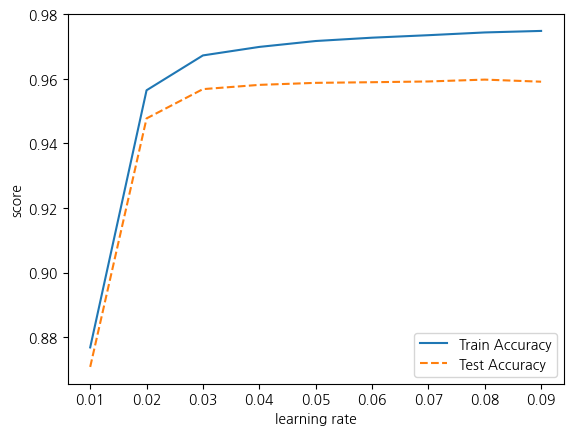

In [44]:
# learning_rate 에 따른 모델 성능
train_score = []; test_score = []
para_lr = [lr*0.01 for lr in range(1,10)]
for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor( n_estimators=140,\
                              min_samples_leaf = 4, \
                          max_depth = 5,learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))    

df_score_lr = pd.DataFrame()
df_score_lr["Learning rate"] = para_lr
df_score_lr["TrainAccuracy"] = train_score
df_score_lr["TestAccuracy"] = test_score

# 모델 설명력 확인
print(df_score_lr.round(3))
plt.plot(para_lr, train_score, linestyle='-',label='Train Accuracy')
plt.plot(para_lr, test_score, linestyle='--',label='Test Accuracy')
plt.ylabel("score"); plt.xlabel("learning rate")
plt.legend()
#### learning_rate -> 0.08

In [10]:
para_n_tree = [n_tree*10 for n_tree in range(1,11)]
para_leaf = [leaf for leaf in range(1,21)]
para_split = [split*2 for split in range(1,21)]
para_depth = [depth for depth in range(1,11)]
para_lr = [lr*0.02 for lr in range(1,10)]

#### GridSearchCV를 이용해 최적 parameter 찾기

In [ ]:
# estimator = RandomForestRegressor()
# param_grid = {'criterion': ['min_squared_error','friedman_mse', 'min_absolute_error'], \
#               'n_estimators' : para_n_tree, 'max_depth': para_depth, \
#               'min_samples_leaf': para_leaf, 'min_samples_split': para_split,\
#              'learning_rate' : para_lr}

# grid_rf = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs=-1)
# grid_rf.fit(df_train_x, df_train_y)

# print("best estimator model:\n{}\n".format(grid_rf.best_estimator_))
# print("best parameter model:\n{}\n".format(grid_rf.best_params_))
# print("best score model:\n{}\n".format(grid_rf.best_score_.round(3)))

#### 최종 모델 생성

In [24]:
gb_final = GradientBoostingRegressor(  n_estimators=140,\
                              min_samples_leaf = 4, \
                          max_depth = 5,learning_rate =  0.08 )
gb_final.fit(df_train_x, df_train_y)
print(gb_final.get_params(),end="\n\n")

test_pred = gb_final.predict(df_test_x)

print('test data의 실제 값:\n',df_test_y[:10])
print('test data의 예측 값:\n',test_pred[:10])

print("\nscore on training set:{:.3f}\n".format(gb_final.score(df_train_x,df_train_y)))
print("score on test set:{:.3f}".format(gb_final.score(df_test_x,df_test_y)))

{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.08, 'loss': 'squared_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 140, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

test data의 실제 값:
 8696      46600
12006     47500
3424      16700
5661      56900
10007     48300
3961      59300
16142     18500
18154    110750
5217       1500
7188     105000
Name: Price, dtype: int64
test data의 예측 값:
 [ 42395.28502921  35639.42793404  14867.87007107  66300.08227908
  58198.64205849  56556.44379539  17806.92382521 120358.5883052
   2349.67681406 126448.17226244]

score on training set:0.975

score on test set:0.958


#### feature_importances

In [ ]:
# df_importance.sort_values("Importance", ascending=True, inplace=True)
# coordinates = range(len(df_importance))
# plt.figure(figsize=(18,12))
# plt.barh(y=coordinates, width=df_importance["Importance"])
# plt.yticks(coordinates, df_importance['Feature'])
# plt.title("Decision Tree의 변수 중요도", fontsize=60)
# plt.xlabel("변수 중요도", fontsize=50)
# plt.ylabel("변수", fontsize=50)
# plt.xticks( fontsize = 40)
# plt.yticks(fontsize = 20)

# print("\nDecision Tree score model:{:.3f}\n".format(tree_final.score(df_test_x,df_test_y)))

           Feature  Importance
7           식품_가공식       0.574
8           식품_식재료       0.178
13           음료_음료       0.088
10        아이스크_아이스       0.034
5          과자류_빵/디       0.032
9           식품_안주류       0.031
6           과자류_스낵       0.026
4          과자류_껌/초       0.018
1         간편식사_도시락       0.007
2        간편식사_샌드위치       0.005
12          음료_유제품       0.002
3         간편식사_주먹밥       0.001
16        즉석조리_튀김류       0.001
11          음료_아이스       0.001
15        즉석조리_즉석커       0.001
25         TempAvg       0.000
26  RainfallAmount       0.000
14        즉석조리_베이커       0.000
27        HumidAvg       0.000
0       SalesMonth       0.000
22    AgeGroup_40대       0.000
17       Gender_남성       0.000
20    AgeGroup_20대       0.000
21    AgeGroup_30대       0.000
18       Gender_여성       0.000
24  AgeGroup_60대이상       0.000
19    AgeGroup_10대       0.000
23    AgeGroup_50대       0.000


Text(0, 0.5, '변수')

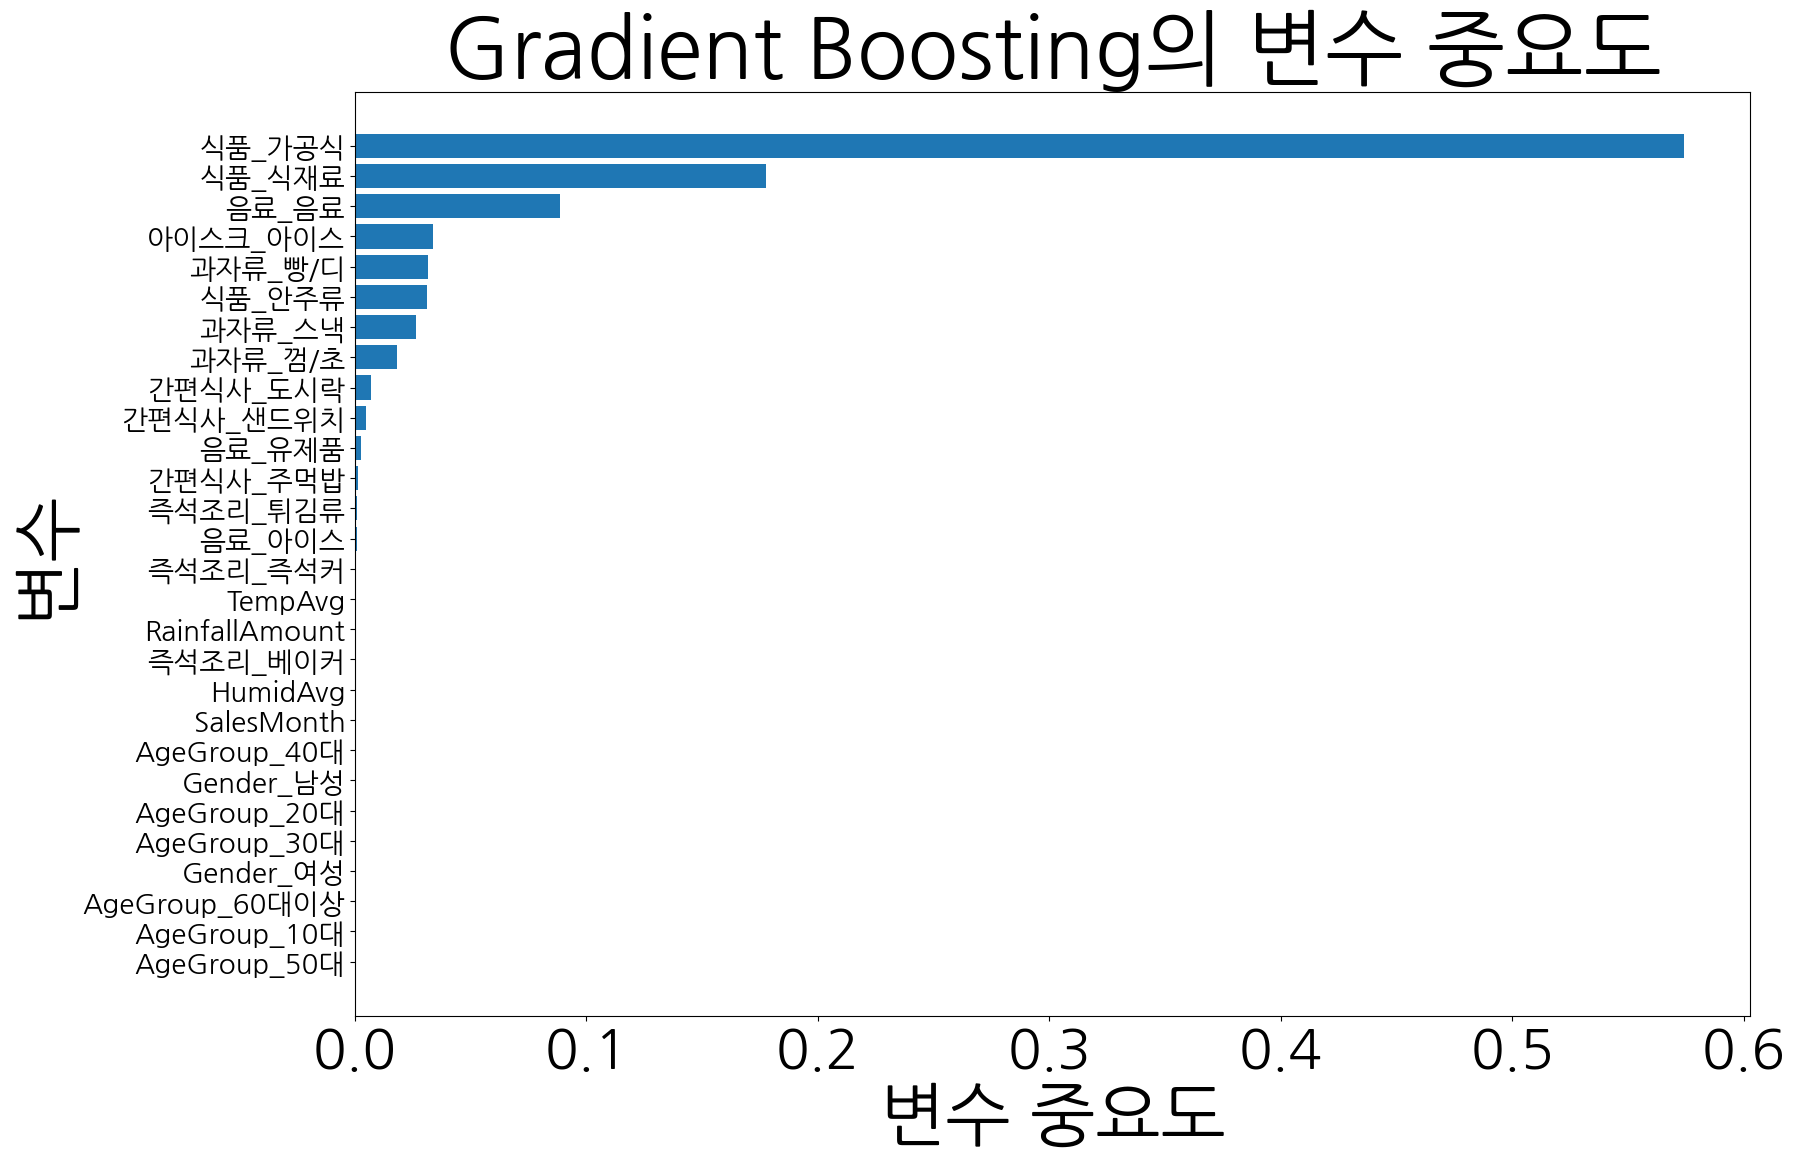

In [26]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
print(df_importance.round(3))

df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.figure(figsize=(18,12))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance['Feature'],fontsize = 20)
plt.xticks( fontsize = 40)
plt.title("Gradient Boosting의 변수 중요도", fontsize=60)
plt.xlabel("변수 중요도", fontsize=50)
plt.ylabel("변수", fontsize=50)

### xgboost

#### 기본 옵션으로 모델 생성

In [50]:
xgb_uncustomized = xgboost.XGBRegressor()
xgb_uncustomized.fit(df_train_x, df_train_y)

print("-------UNCUSTOMIZED XGBoost-------")
print("")
print(xgb_uncustomized.get_params())
print("")
print("Score on training set: {:.3f}".format(xgb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(xgb_uncustomized.score(df_test_x, df_test_y)))

-------UNCUSTOMIZED XGBoost-------

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}

Score on training set: 0.985
Score on test set: 0.951


#### 모델 파라미터 조정

    Estimators  TrainAccuracy  TestAccuracy
0           10          0.961         0.945
1           20          0.971         0.951
2           30          0.975         0.952
3           40          0.977         0.952
4           50          0.979         0.952
5           60          0.980         0.952
6           70          0.982         0.952
7           80          0.983         0.952
8           90          0.984         0.951
9          100          0.985         0.951
10         110          0.987         0.951
11         120          0.988         0.951
12         130          0.988         0.950
13         140          0.989         0.950
14         150          0.990         0.950
15         160          0.990         0.950
16         170          0.991         0.950
17         180          0.991         0.950
18         190          0.992         0.950
19         200          0.992         0.950


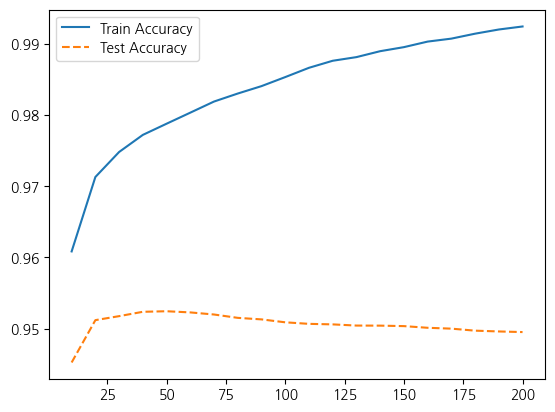

In [53]:
# n_estimators 에 따른 모델 성능
train_score = []; test_score = []
para_n_tree = [n_tree*10 for n_tree in range(1,21)]
for v_n_estimators in para_n_tree:
    xgb = xgboost.XGBRegressor( n_estimators=v_n_estimators)
    xgb.fit(df_train_x, df_train_y)
    train_score.append(xgb.score(df_train_x, df_train_y))
    test_score.append(xgb.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["Estimators"] = para_n_tree
df_score_n["TrainAccuracy"] = train_score
df_score_n["TestAccuracy"] = test_score

# 모델 설명력 확인
print(df_score_n.round(3))

plt.plot(para_n_tree, train_score, linestyle='-',label='Train Accuracy')
plt.plot(para_n_tree, test_score, linestyle='--',label='Test Accuracy')
plt.legend()

#### Estimators-> 80

   Depth  TrainAccuracy  TestAccuracy
0      1          0.946         0.946
1      2          0.956         0.955
2      3          0.964         0.957
3      4          0.970         0.955
4      5          0.976         0.955
5      6          0.983         0.952
6      7          0.990         0.950
7      8          0.995         0.948
8      9          0.998         0.948
9     10          1.000         0.945


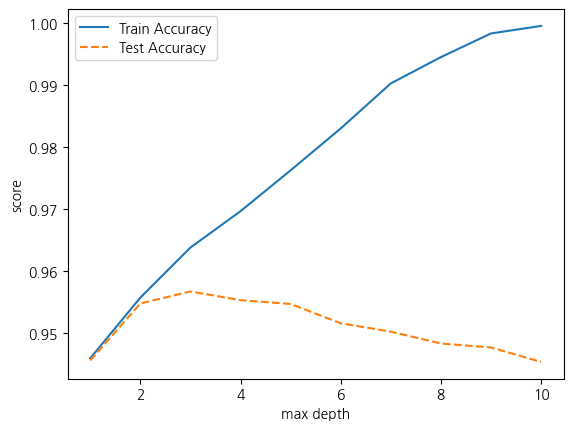

In [55]:
# max_depth 에 따른 모델 성능
train_score = []; test_score = []
para_depth = [depth for depth in range(1,11)]
for v_max_depth in para_depth:
    xgb = xgboost.XGBRegressor(  n_estimators=80,\
                                   max_depth = v_max_depth)
    xgb.fit(df_train_x, df_train_y)
    train_score.append(xgb.score(df_train_x, df_train_y))
    test_score.append(xgb.score(df_test_x, df_test_y))    

df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainAccuracy"] = train_score
df_score_depth["TestAccuracy"] = test_score

# 모델 설명력 확인
print(df_score_depth.round(3))
plt.plot(para_depth, train_score, linestyle='-',label='Train Accuracy')
plt.plot(para_depth, test_score, linestyle='--',label='Test Accuracy')
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()
#### max_depth -> 5

    Learning rate  TrainAccuracy  TestAccuracy
0            0.01          0.410         0.406
1            0.02          0.837         0.831
2            0.03          0.934         0.927
3            0.04          0.958         0.949
4            0.05          0.965         0.955
5            0.06          0.968         0.957
6            0.07          0.969         0.957
7            0.08          0.970         0.958
8            0.09          0.971         0.958
9            0.10          0.971         0.958
10           0.11          0.972         0.958
11           0.12          0.972         0.958
12           0.13          0.973         0.958
13           0.14          0.973         0.958


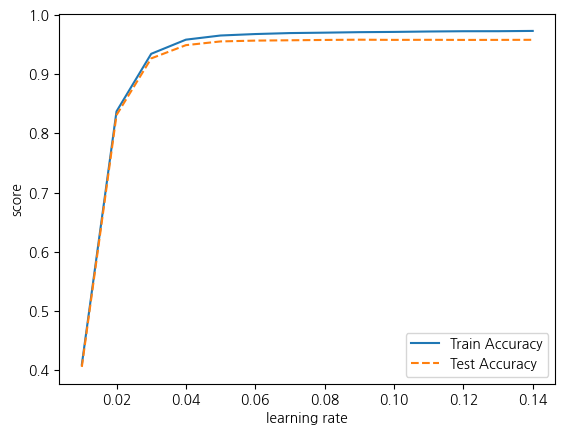

In [57]:
# learning_rate 에 따른 모델 성능
train_score = []; test_score = []
para_lr = [lr*0.01 for lr in range(1,15)]
for v_learning_rate in para_lr:
    xgb = xgboost.XGBRegressor( n_estimators=80,\
                          max_depth = 5,learning_rate = v_learning_rate)
    xgb.fit(df_train_x, df_train_y)
    train_score.append(xgb.score(df_train_x, df_train_y))
    test_score.append(xgb.score(df_test_x, df_test_y))    

df_score_lr = pd.DataFrame()
df_score_lr["Learning rate"] = para_lr
df_score_lr["TrainAccuracy"] = train_score
df_score_lr["TestAccuracy"] = test_score

# 모델 설명력 확인
print(df_score_lr.round(3))
plt.plot(para_lr, train_score, linestyle='-',label='Train Accuracy')
plt.plot(para_lr, test_score, linestyle='--',label='Test Accuracy')
plt.ylabel("score"); plt.xlabel("learning rate")
plt.legend()
#### learning_rate -> 0.1

In [10]:
para_n_tree = [n_tree*10 for n_tree in range(1,11)]
para_leaf = [leaf for leaf in range(1,21)]
para_split = [split*2 for split in range(1,21)]
para_depth = [depth for depth in range(1,11)]
para_lr = [lr*0.02 for lr in range(1,10)]

#### GridSearchCV를 이용해 최적 parameter 찾기

In [ ]:
# estimator = RandomForestRegressor()
# param_grid = {'criterion': ['min_squared_error','friedman_mse', 'min_absolute_error'], \
#               'n_estimators' : para_n_tree, 'max_depth': para_depth, \
#               'min_samples_leaf': para_leaf, 'min_samples_split': para_split,\
#              'learning_rate' : para_lr}

# grid_rf = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs=-1)
# grid_rf.fit(df_train_x, df_train_y)

# print("best estimator model:\n{}\n".format(grid_rf.best_estimator_))
# print("best parameter model:\n{}\n".format(grid_rf.best_params_))
# print("best score model:\n{}\n".format(grid_rf.best_score_.round(3)))

#### 최종 모델 생성

In [25]:
xgb_final = xgboost.XGBRegressor(  n_estimators=80,\
                          max_depth = 5,learning_rate = 0.1)
xgb_final.fit(df_train_x, df_train_y)
print(xgb_final.get_params(),end="\n\n")

test_pred = xgb_final.predict(df_test_x)

print('test data의 실제 값:\n',df_test_y[:10])
print('test data의 예측 값:\n',test_pred[:10])

print("\nscore on training set:{:.3f}\n".format(xgb_final.score(df_train_x,df_train_y)))
print("score on test set:{:.3f}".format(xgb_final.score(df_test_x,df_test_y)))

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 80, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}

test data의 실제 값:
 8696      46600
12006     47500
3424      16700
5661      56900
10007     48300
3961      5

#### feature_importances

           Feature  Importance
7           식품_가공식       0.502
8           식품_식재료       0.203
13           음료_음료       0.091
5          과자류_빵/디       0.038
6           과자류_스낵       0.035
9           식품_안주류       0.032
10        아이스크_아이스       0.032
4          과자류_껌/초       0.022
1         간편식사_도시락       0.009
2        간편식사_샌드위치       0.007
12          음료_유제품       0.005
3         간편식사_주먹밥       0.003
16        즉석조리_튀김류       0.003
15        즉석조리_즉석커       0.003
11          음료_아이스       0.003
14        즉석조리_베이커       0.001
23    AgeGroup_50대       0.001
26  RainfallAmount       0.001
24  AgeGroup_60대이상       0.001
17       Gender_남성       0.001
25         TempAvg       0.001
20    AgeGroup_20대       0.001
22    AgeGroup_40대       0.001
27        HumidAvg       0.001
19    AgeGroup_10대       0.001
0       SalesMonth       0.001
21    AgeGroup_30대       0.001
18       Gender_여성       0.000


Text(0, 0.5, '변수')

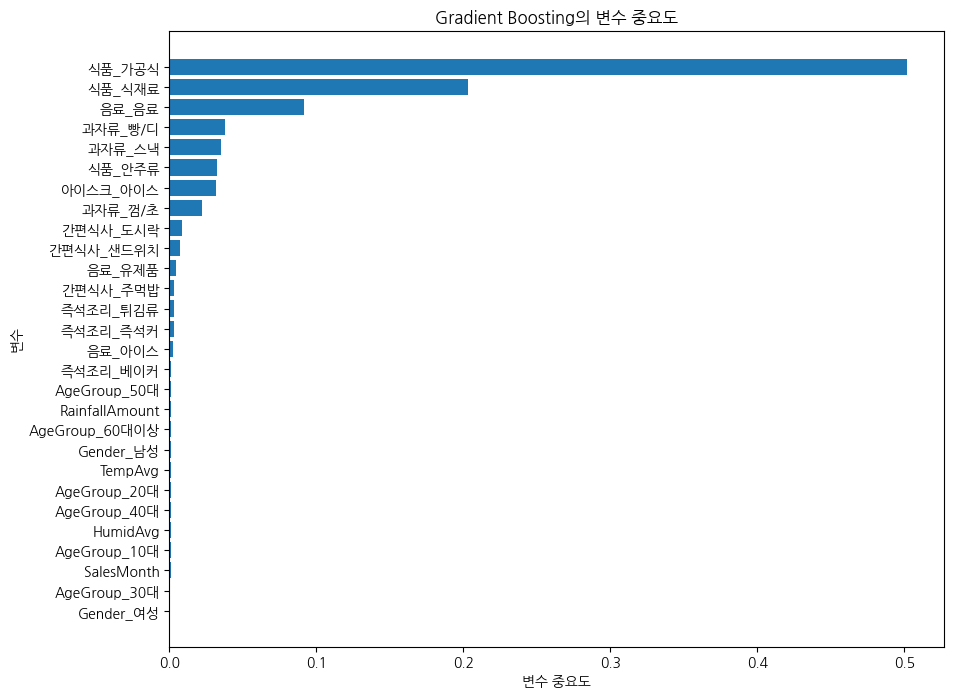

In [59]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = xgb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
print(df_importance.round(3))

df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.figure(figsize=(10,8))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance['Feature'])
plt.title("Gradient Boosting의 변수 중요도")
plt.xlabel("변수 중요도")
plt.ylabel("변수")